### 이상치
- 이상치를 확인하는 방법은 여러가지가 존재한다. 
- 일반적인 수치형 변수의 경우에는 IQR 방식을 이상치 판단 기준으로 사용할 수 있다. 
- IQR(Inter Quantile Range)방식은 시각화에서 사용한 Boxplot의 이상치 결정 방법을 그대로 사용한 것이다. 
- IQR의 값을 구하는 방법은 Q3(제3사분위수)와 Q1(제1사분위수)의 차이의 값을 말한다. 
- 이상치의 경계는 (Q3 + 1.5 * IQR)보다 크거나 (Q1 - 1.5 * IQR)보다 작은 범위를 이상치로 간주한다. 
- IQR를 이용한 방법은 많은 데이터를 이상치로 간주할 위험이 존재한다. 
- 무조건 1.5 * IQR 규칙을 사용하기 보다는 데이터의 유형을 살펴보고 필요에 따라 곱하는 값을 조정하는것도 좋은 방법이다. 

### 실습
1. 사이킷런의 wine 데이터를 로드하여 "color_intensity" 컬럼의 이상치를 IQR 방식으로 확인해보자

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
import numpy as np

In [13]:
## wine 데이터를 로드하여 데이터프레임화
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [14]:
## wine target을 class 컬럼에 삽입
wine['Class'] = wine_load.target
## map 함수를 이용하여 데이터의 값을 변환
wine['Class'] = wine['Class'].map(
    {
        0 : 'class_0', 
        1 : 'class_1', 
        2 : 'class_2'
    }
)
wine['Class'].value_counts()

class_1    71
class_0    59
class_2    48
Name: Class, dtype: int64

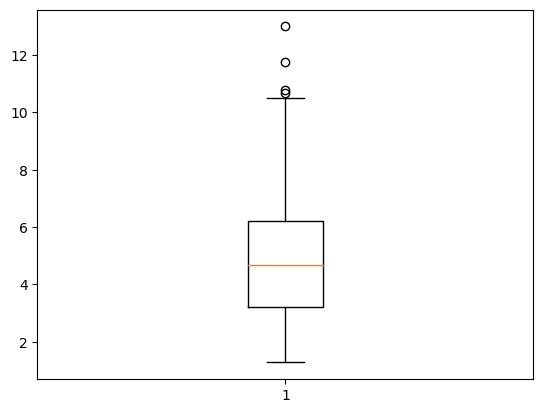

In [4]:
## matplotlib 라이브러리의 boxplot을 이용하여 이상치 확인
plt.boxplot(wine['color_intensity'])
plt.show()

In [9]:
## 이상치를 출력하는 함수 생성
## 매개변수 2개 데이터 프레임, 컬럼의 이름
def outliers_iqr(df, col):
    quartile_1, quartile_3 = np.percentile(df[col], [25, 75]) # (25% , 75%) 의 값
    iqr = quartile_3 - quartile_1
    # 하단 경계 값, 상단 경계 값
    lower_whis = quartile_1 - (1.5 * iqr)
    upper_whis = quartile_3 + (1.5 * iqr)
    outliers = df[(df[col] > upper_whis) | (df[col] < lower_whis)]
    ## 데이터 프레임 형태로 return
    return outliers[[col]]

In [16]:
outliers = outliers_iqr(wine, 'color_intensity')
outliers

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


## 이상치의 정제 
1. 이상치의 제거 
    - 데이터의 수가 매우 많고 이상치가 존재하는 행이 전체 데이터의 비해 많지 않을 경우는 이상치를 제거할 수 있다. 
2. 이상치의 대체
    - 이상치를 다른 값으로 대체하여 사용하는 방법이다. 

In [18]:
## 이상치 제거 
drop_outliers = wine.drop(outliers.index,axis=0)
print("원본 데이터의 크기 :", wine.shape)
print("이상치 제거한 데이터의 크기 :", drop_outliers.shape)

원본 데이터의 크기 : (178, 14)
이상치 제거한 데이터의 크기 : (174, 14)


In [14]:
## 이상치 대체
## 이상치를 결측치로 변경 후 결측치를 채워넣는 방식을 추천
wine.loc[outliers.index, 'color_intensity'] = np.NaN

##결측치의 값을 color_intensity의 평균값으로 대체
wine['color_intensity'] = wine['color_intensity'].fillna(wine['color_intensity'].mean())
wine.loc[outliers.index, 'color_intensity']


151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64